# Individual Planning Stage

Sameed Tahir 
72424070 
Group 9

In [3]:
library(tidyverse)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1) Data Description

For this project, we were given the dataset "players.csv". This dataset has 196 observations and 7 variables. These variables include:

- experience: string, Categorical classification of the skill level of the player. Includes "Beginner", "Amateur", "Regular", "Pro", "Veteran"
- subscribe: logical, TRUE if subscribed, FALSE if not
- hashedEmail: string, unique email for each player
- played_hours: integer, total number of hours played
- name: string, name of player
- gender: string, gender of player
- Age: integer, age of player

For the data analysis, the name and hashed email of the player aren't helpful since we cannot use them to classify or predict anything about the players.

In [10]:
players <- read_csv("data/players.csv") |>
            select(experience, subscribe, played_hours, gender, Age)

averages <- players |> 
            select(played_hours, Age) |>
            map(mean, na.rm = TRUE)
averages

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


$played_hours
[1] 5.845918

$Age
[1] 21.13918

I have created a variable to hold the information from the dataset in players, The average amount of hours played is 5.85 hours. The average age of the players is 21 years old. Below I have the summary statistics of the gender of the players. A majority of the players are male, with 124 of the 196 players being male. This equates to 63% of the player base being male.

In [7]:
num_gender <- players |>
                count(gender) |>
                mutate(percentage = n / sum(n) * 100)
num_gender

gender,n,percentage
<chr>,<int>,<dbl>
Agender,2,1.0204082
Female,37,18.8775510
Male,124,63.2653061
Non-binary,15,7.6530612
Other,1,0.5102041
Prefer not to say,11,5.6122449
Two-Spirited,6,3.0612245


The same analysis can be done for the experience level of the players. Amateur is the experience level with the most amount of players, with Pro being the least.

In [10]:
num_exp <- players |>
                count(experience) |>
                mutate(percentage = n / sum(n) * 100)
num_exp

experience,n,percentage
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


## 2) Questions

For this assignment, I chose to answer the first broad question "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?".

The specific question I have formulated is **"Can player demographics (Age, gender, experience) and engagement (played_hours, sessions from sessions.csv) predict if a player is subscribed?".** The session count from sessions.csv can be found by using the unique hashed email to count the amount of sessions a player has started.

## 3) Exploratory Data Analysis and Visualization

Many pieces of the exploratory data analysis have already been completed above in question 1. I will be creating visualizations currently.

This is a histogram of the hours played by each player. It shows the number of players who played a certain amount of hours. The graph shows how a majority of the players have played under or around 1 hour in total.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


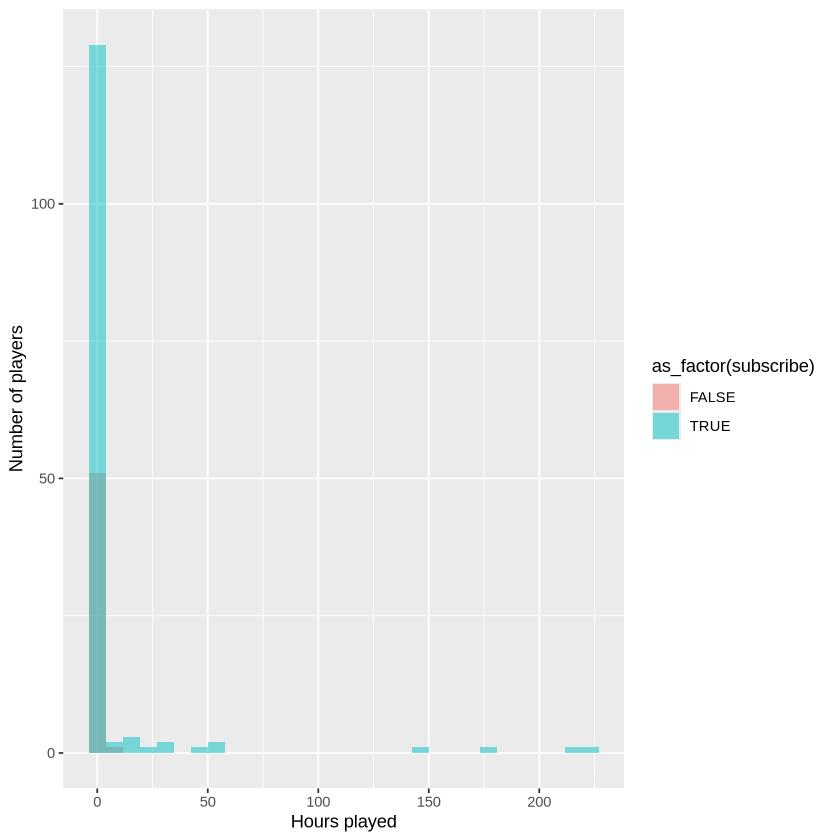

In [17]:
hours_hist <- players |>
                ggplot(aes(x = played_hours, fill = as_factor(subscribe))) +
                geom_histogram(alpha = 0.5, position = "identity") +
                labs(x = "Hours played", y = "Number of players")
hours_hist

## 4) Methods and Plan

For my question, we want to determine if we can predict if a player is subscribed or not, which makes this a classification problem. Classification using KNN is going to be the most effective strategy since subscribe is a binary variable, meaning it is either true or false. KNN is the most appropriate because it is a non-parametric meothod that can interpret non-linear patterns in the player's behavior. KNN does not make strong assumptions about the underlying data. To apply it properly we must standardize the data first so all the variables contribute equally when calculating the distance. 

After the dataset is fully preprocessed, I will split them into training, validation and test sets. This is all to be done before the modelling. Then I will run cross-validation to tune K. Then I will compare it using metrics like accuracy, precision, recall and the confusion matrix. 